In [9]:
import pandas as pd
import numpy as np

import category_encoders as ce

from pycaret.classification import *

import warnings
warnings.simplefilter('ignore')


# Obtencion de datos

In [4]:
# carga de datos
raw_data = pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\data\train.csv')
test = pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\data\test.csv')

# Analisis de datos

In [6]:
X_raw=raw_data.drop('Churn', axis=1)

y=raw_data.Churn

In [7]:
X_numeric=X_raw._get_numeric_data().drop('id', axis=1)

X_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,25.30
1,0,7,75.15
2,0,4,20.05
3,0,29,76.00
4,0,3,75.10


In [13]:
# valores unicos
object_cols=[]
object_cols =[c for c in data.select_dtypes(include=object)]  # para cada columna object...

# tabulacion de valores en numeros
object_cols2 =[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

dictionary = {}
for c in object_cols2:
    dictionary.update({c:data[c].unique() })
    
pd.DataFrame([dictionary])

#Cambio de valor de las variables categoricas:
# las dependientes de Servicos de internet solo valores No y No Internet Service = 0, Si =1
#Gender: Male:0 Female:1
#Partner: No:0 Yes:1
#Dependents: NO:0 yes:1
#PhoneService: No:0 Yes:1
#paperlessBilling: No:0 Yes:1
# Se aplica get_dummy a MultipleLines,Internetservice, Contract y PaymentMethod 
codificacion = [{'col':'gender','mapping':{'Male':0, 'Female':1}},
                {'col' :'Partner', 'mapping':{'No':0, 'Yes':1}},
                {'col' :'Dependents', 'mapping':{'No':0, 'Yes':1}},
                {'col':'PhoneService','mapping':{'No':0, 'Yes':1}},
                {'col':'PaperlessBilling','mapping':{'No':0, 'Yes':1}},
                {'col':'OnlineSecurity','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'OnlineBackup','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'TechSupport','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'StreamingTV','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'DeviceProtection','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'StreamingMovies','mapping':{'No':0, 'No internet service':0, 'Yes':1}} ]
# Aplicamos la transformación  a las variables catgeoricas
encoder = ce.OrdinalEncoder(cols = ['gender',
                                    'Partner',
                                    'Dependents',
                                    'PhoneService',
                                    'PaperlessBilling',
                                    'OnlineSecurity',
                                     'OnlineBackup',
                                     'DeviceProtection',
                                     'TechSupport',
                                     'StreamingTV',
                                     'StreamingMovies'], mapping= codificacion)

df_encoded =encoder.fit_transform(data)

# Aplicamos la obtencion de dummies


# Definimos qué columnas serán dummificadas y cómo deben ser interpretadas
# Cada clave del diccionario equivale a un nombre de columna
# `prefix` es el prefijo que se añadirá a cada columna dummy
# `sep` especifica el caracter separador de los elementos de la celda
dummy_columns = {
    'Contract': {
        'prefix': 'Cont_',
        'sep': ';'
    },
   'MultipleLines':{
        'prefix': 'Mlines_',
        'sep': ';'
    },
    'InternetService':{
        'prefix': 'IS_',
        'sep': ';'
    },     
    'PaymentMethod':{
        'prefix': 'PayM_',
        'sep': ';'
    } 
    # Aquí podemos añadir todas las columnas que queramos
}

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df_encoded[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df_encoded2 = pd.concat([df_encoded, dummies], axis=1)

# [Opcional] Eliminamos las columnas originales de df
df_encoded2 = df_encoded2.drop(columns=dummy_columns.keys())

# Ahora df.head() mostrará las columnas dummy
df_encoded2.head()

df_encoded3 = df_encoded2.drop(['customerID','TotalCharges','id'], axis = 1)


In [14]:
df_encoded3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,PayM__Bank transfer (automatic),PayM__Credit card (automatic),PayM__Electronic check,PayM__Mailed check
0,0,0,0,1,1,0,0,0,0,0,0,0,1,25.30,1,0,0,1,0
1,1,0,0,0,7,1,0,0,1,0,0,0,1,75.15,0,0,0,1,0
2,1,0,0,1,4,1,0,0,0,0,0,0,1,20.05,0,1,0,0,0
3,1,0,0,0,29,1,0,0,0,0,0,0,1,76.00,0,0,1,0,0
4,1,0,0,0,3,1,0,0,0,0,0,0,1,75.10,1,0,1,0,0


In [15]:
exp_clf101 = setup(data = df_encoded3, target = 'Churn', session_id=123)

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5282, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7993,0.8318,0.5127,0.6565,0.5740,0.4458,0.4526,0.4410
ridge,Ridge Classifier,0.7982,0.0000,0.4811,0.6656,0.5572,0.4313,0.4415,0.0050
lda,Linear Discriminant Analysis,0.7982,0.8310,0.5310,0.6448,0.5813,0.4503,0.4546,0.0070
gbc,Gradient Boosting Classifier,0.7928,0.8288,0.5056,0.6380,0.5633,0.4301,0.4356,0.0790
ada,Ada Boost Classifier,0.7925,0.8286,0.4934,0.6414,0.5568,0.4246,0.4313,0.0420
lightgbm,Light Gradient Boosting Machine,0.7866,0.8149,0.5158,0.6159,0.5606,0.4214,0.4247,0.1740
catboost,CatBoost Classifier,0.7863,0.8236,0.4883,0.6232,0.5469,0.4101,0.4156,0.8370
rf,Random Forest Classifier,0.7798,0.8046,0.4536,0.6150,0.5218,0.3832,0.3908,0.1030
xgboost,Extreme Gradient Boosting,0.7728,0.8005,0.4934,0.5847,0.5348,0.3860,0.3887,0.1260
knn,K Neighbors Classifier,0.7666,0.7730,0.4985,0.5695,0.5312,0.3768,0.3785,0.0130


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
Logreg=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7919,0.8167,0.4490,0.6567,0.5333,0.4054,0.4176
1,0.8108,0.8398,0.5306,0.6842,0.5977,0.4766,0.4832
2,0.8108,0.8728,0.5306,0.6842,0.5977,0.4766,0.4832
3,0.8459,0.8656,0.6633,0.7303,0.6952,0.5924,0.5937
4,0.7838,0.7946,0.4490,0.6286,0.5238,0.3889,0.3981
5,0.7757,0.8340,0.5204,0.5862,0.5514,0.4025,0.4038
6,0.7811,0.8271,0.5354,0.6023,0.5668,0.4210,0.4224
7,0.7886,0.8227,0.4592,0.6429,0.5357,0.4038,0.4133
8,0.8049,0.8312,0.5408,0.6625,0.5955,0.4687,0.4729
9,0.7995,0.8132,0.4490,0.6875,0.5432,0.4219,0.4376


In [20]:
tuned_Logreg = tune_model(Logreg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7919,0.8171,0.4490,0.6567,0.5333,0.4054,0.4176
1,0.8108,0.8394,0.5306,0.6842,0.5977,0.4766,0.4832
2,0.8135,0.8730,0.5408,0.6883,0.6057,0.4859,0.4919
3,0.8432,0.8654,0.6531,0.7273,0.6882,0.5839,0.5854
4,0.7838,0.7951,0.4490,0.6286,0.5238,0.3889,0.3981
5,0.7757,0.8340,0.5204,0.5862,0.5514,0.4025,0.4038
6,0.7865,0.8270,0.5455,0.6136,0.5775,0.4353,0.4367
7,0.7832,0.8229,0.4592,0.6250,0.5294,0.3928,0.4007
8,0.8049,0.8317,0.5408,0.6625,0.5955,0.4687,0.4729
9,0.7995,0.8131,0.4490,0.6875,0.5432,0.4219,0.4376


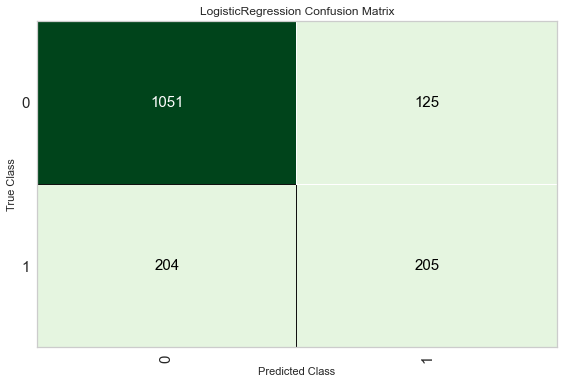

In [21]:
plot_model(tuned_Logreg, plot = 'confusion_matrix')

In [22]:
predict_model(tuned_Logreg);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7924,0.8262,0.5012,0.6212,0.5548,0.4215,0.4256


In [24]:
final_Logreg = finalize_model(tuned_Logreg)

# Aplicacion a la prueba

In [25]:
df_encoded =encoder.fit_transform(test)

# Aplicamos la obtencion de dummies


# Definimos qué columnas serán dummificadas y cómo deben ser interpretadas
# Cada clave del diccionario equivale a un nombre de columna
# `prefix` es el prefijo que se añadirá a cada columna dummy
# `sep` especifica el caracter separador de los elementos de la celda
dummy_columns = {
    'Contract': {
        'prefix': 'Cont_',
        'sep': ';'
    },
   'MultipleLines':{
        'prefix': 'Mlines_',
        'sep': ';'
    },
    'InternetService':{
        'prefix': 'IS_',
        'sep': ';'
    },     
    'PaymentMethod':{
        'prefix': 'PayM_',
        'sep': ';'
    } 
    # Aquí podemos añadir todas las columnas que queramos
}

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df_encoded[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df_encoded2 = pd.concat([df_encoded, dummies], axis=1)

# [Opcional] Eliminamos las columnas originales de df
df_encoded2 = df_encoded2.drop(columns=dummy_columns.keys())

# Ahora df.head() mostrará las columnas dummy
df_encoded2.head()

df_encoded3 = df_encoded2.drop(['customerID','TotalCharges','id'], axis = 1)


In [26]:
df_encoded3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,PayM__Bank transfer (automatic),PayM__Credit card (automatic),PayM__Electronic check,PayM__Mailed check
0,1,0,1,0,1,0,0,0,0,0,0,0,1,24.80,0,0,1,0
1,0,0,0,0,41,1,0,0,0,0,0,0,1,25.25,1,0,0,0
2,1,0,1,1,52,1,0,0,0,0,0,0,0,19.35,0,0,0,1
3,1,0,0,0,1,1,0,0,1,0,0,0,0,76.35,0,0,1,0
4,0,0,0,0,67,1,0,0,0,1,0,0,0,50.55,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1,0,0,0,3,1,0,0,0,0,0,0,1,75.80,0,0,1,0
1757,1,0,1,0,8,1,0,0,0,1,0,1,1,90.25,0,0,1,0
1758,0,0,0,0,29,1,0,1,1,0,0,1,0,70.90,0,1,0,0
1759,1,0,0,0,2,0,0,0,0,0,0,1,1,34.70,0,0,1,0


In [29]:
y_pred = predict_model(final_Logreg , data=df_encoded3)



In [37]:
y_pred= pd.DataFrame(y_pred)
y_pred2=pd.DataFrame(y_pred['Label'])

In [38]:

y_pred2.columns=['Churn']


y_pred2.insert(1,'id',test['id'], True)

In [41]:
y_pred2.to_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\ramon_LogReg_pycaret.csv', index= False, sep=',')